# Plot GNSS movement, from absolute position data

Using the pandas series,

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob
from numpy import linalg as LA
from functools import reduce
import os
import sys
import time
import datetime 
import pandas as pd
import geopandas as gpd

from geopandas import GeoDataFrame
from shapely.geometry import Point
import fiona

sys.path.append(os.path.abspath('/Users/home/whitefar/DATA/code/'))
os.chdir("/Users/home/whitefar/DATA/TASMAN/ABSOLUTE/")

In [15]:
#with only the site_units that have data over the time period
site_units = [['tal1', 'arc2'], ['tal2', 'arc1'], ['tac2', 'arc5'], ['tac3', 'arc4'], ['tar2', 'arc6']] #these are the ones with data

dfs = {}  #dataframes

for site, unit in site_units:
    dfs[site+unit] = gpd.read_file(f"/Volumes/arc_04/whitefar/DATA/TASMAN/GNSS_ABSOLUTE/GNSS_dataframe/{site+unit}_moreattributes.shp")

In [16]:
dfs.keys()

dict_keys(['tal1arc2', 'tal2arc1', 'tac2arc5', 'tac3arc4', 'tar2arc6'])

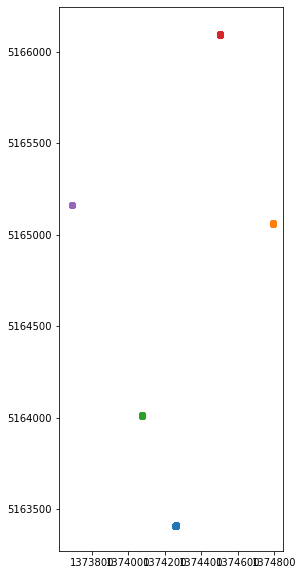

In [37]:
fig, ax = plt.subplots(1,1,figsize=[10,10])
for df in dfs:
    dfs[df].plot(ax=ax)

In [66]:
dfs['tal1arc2'].geometry.x.to_numpy().min()

1374257.9028180076

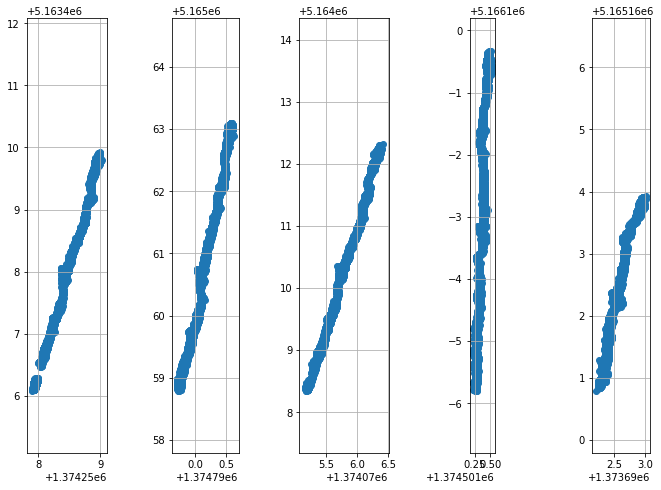

In [111]:
fig, axs = plt.subplots(1,5,figsize=[12,8],gridspec_kw = {'height_ratios':[1]})
axs = axs.ravel()
for i,df in enumerate(dfs):
    
    ymin = dfs[df].geometry.y.to_numpy().min()
    dfs[df].plot(ax=axs[i]).set_ylim(ymin-1,ymin+6)
    axs[i].grid()
    


In [81]:
dfs['tal1arc2'].cumulative.max()

396.8055302000626

In [132]:
dist = {}
for i,df in enumerate(dfs):
    l = dfs[df].shape[0] -1
    dist[df] = dfs[df].geometry[0].distance(dfs[df].geometry[l])
dist

{'tal1arc2': 3.923358812793309,
 'tal2arc1': 4.333806707170696,
 'tac2arc5': 4.135375858764071,
 'tac3arc4': 5.458751952889452,
 'tar2arc6': 3.146668009654874}

In [122]:
time = {}
for i,df in enumerate(dfs):
    l = dfs[df].shape[0] -1
    time[df] = (dfs[df].Timestamp[l] -dfs[df].Timestamp[0])/60/60/24
time

{'tal1arc2': 17.0,
 'tal2arc1': 14.666666666666666,
 'tac2arc5': 17.0,
 'tac3arc4': 17.0,
 'tar2arc6': 17.0}

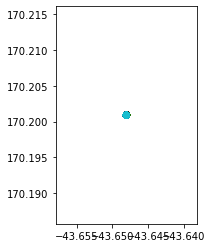

In [31]:
fig, ax = plt.subplots(1, 1)
gdfe.plot(column="Points",ax=ax)

In [29]:
gdfe.Points

0              POINT (-43.648039569 170.20091327)
1             POINT (-43.648039386 170.200913297)
2             POINT (-43.648039422 170.200913215)
3             POINT (-43.648039462 170.200913311)
4             POINT (-43.648039426 170.200913323)
                           ...                   
43801         POINT (-43.648073208 170.200898615)
43802    POINT (-43.64807324100001 170.200898541)
43803         POINT (-43.648073247 170.200898609)
43804         POINT (-43.648073158 170.200898619)
43805    POINT (-43.64807323100001 170.200898615)
Name: Points, Length: 43806, dtype: object